In [1]:
import pandas as pd

In [38]:
# Validation dataset

models = []
models.append(pd.read_pickle("Good_CNNx4+BN+DO_model-I-1.7(nonneg)-val.pkl"))
models.append(pd.read_pickle("Good_MLPx4+BN+DO_model-II-Copy1.5-val.pkl"))
models.append(pd.read_pickle("Great_MLPx4+BN+DO_model-Copy1.5-val.pkl"))
models.append(pd.read_pickle("great_model-Copy1.5-val.pkl"))
models.append(pd.read_pickle("really_great_model-Copy1.5-val.pkl"))
models.append(pd.read_pickle("really_really_great_model-Copy1.5-val.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-II-1.7(nonneg)-val.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-III-1.7-val.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-IV-1.7-val.pkl"))
#models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-model-I-1.7(nonneg)-val.pkl"))

models = pd.concat(models, axis=1)

true = pd.read_pickle("results-val.pkl")
pred = models.median(axis=1)

In [36]:
# Test dataset

models = []
models.append(pd.read_pickle("Good_CNNx4+BN+DO_model-I-1.7(nonneg)-test.pkl"))
models.append(pd.read_pickle("Good_MLPx4+BN+DO_model-II-Copy1.5-test.pkl"))
models.append(pd.read_pickle("Great_MLPx4+BN+DO_model-Copy1.5-test.pkl"))
models.append(pd.read_pickle("great_model-Copy1.5-test.pkl"))
models.append(pd.read_pickle("really_great_model-Copy1.5-test.pkl"))
models.append(pd.read_pickle("really_really_great_model-Copy1.5-test.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-II-1.7(nonneg)-test.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-III-1.7-test.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-IV-1.7-test.pkl"))
#models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-model-I-1.7(nonneg)-val.pkl"))

models = pd.concat(models, axis=1)

true = pd.read_pickle("results-test.pkl")
pred = models.median(axis=1)

Actual data ratio: 43.68% Positive, 56.32% Negative
Prediction data ratio: 60.92% Positive, 39.08% Negative

Classification Metrics

Won : 48
Lost : 39
Total : 87
Diff : 9

Accuracy : 55.17%
Information Coefficient (Edge): 10.34%
Expected Value (Annualised): 6052.44%

Precision: Of all the predicted Buys/Sells, how many were correct?
Precision (Buy) : 49.06%
Precision (Sell): 64.71%

Recall: Of all the actual Buys/Sells, how many were correct?
Recall (Buy): 68.42%
Recall (Sell): 44.90%

F1 Score: Harmonic mean of Precision and Recall for the Buys/Sells
F1 Score (Buy): 57.14%
F1 Score (Sell): 53.01%


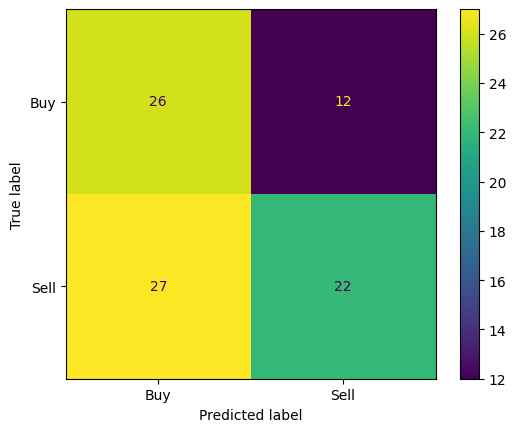

In [37]:
from tradeframework.api.insights import InsightManager
import warnings
warnings.filterwarnings("ignore")

print(f"Actual data ratio: {len(true.values[true>0])/len(true):.2%} Positive, {len(true.values[true<0])/len(true):.2%} Negative")
print(f"Prediction data ratio: {len(pred.values[pred>0])/len(pred):.2%} Positive, {len(pred.values[pred<0])/len(pred):.2%} Negative")

im = InsightManager(None)
im.addInsightGenerator(im.createInsightGenerator("ConfusionMatrix", opts={"actual":true[0], "predictions":pred, "noHold":True, "returnsData":False}))
#im.addInsightGenerator(im.createInsightGenerator("ConfusionMatrix", opts={"baseline":p.assets[0], "noHold":True}))

results = im.generateInsights()

In [40]:
models.corr()

,0,0,0,0,0,0,0,0,0
0,1.000000,0.366244,0.338606,0.205480,0.305650,0.317592,0.433894,0.332178,0.335494
0,0.366244,1.000000,0.315421,0.159029,0.349430,0.386172,0.349430,0.198219,0.302676
0,0.338606,0.315421,1.000000,0.097999,0.287213,0.372054,0.246183,0.085592,0.115446
0,0.205480,0.159029,0.097999,1.000000,0.319666,0.253984,-0.002010,0.161468,0.077983
0,0.305650,0.349430,0.287213,0.319666,1.000000,0.485028,0.434343,0.263391,0.310601
0,0.317592,0.386172,0.372054,0.253984,0.485028,1.000000,0.526662,0.214953,0.456438
0,0.433894,0.349430,0.246183,-0.002010,0.434343,0.526662,1.000000,0.347677,0.635412
0,0.332178,0.198219,0.085592,0.161468,0.263391,0.214953,0.347677,1.000000,0.421367
0,0.335494,0.302676,0.115446,0.077983,0.310601,0.456438,0.635412,0.421367,1.000000
